In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [4]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Text(0, 0.5, 'Number of sales')

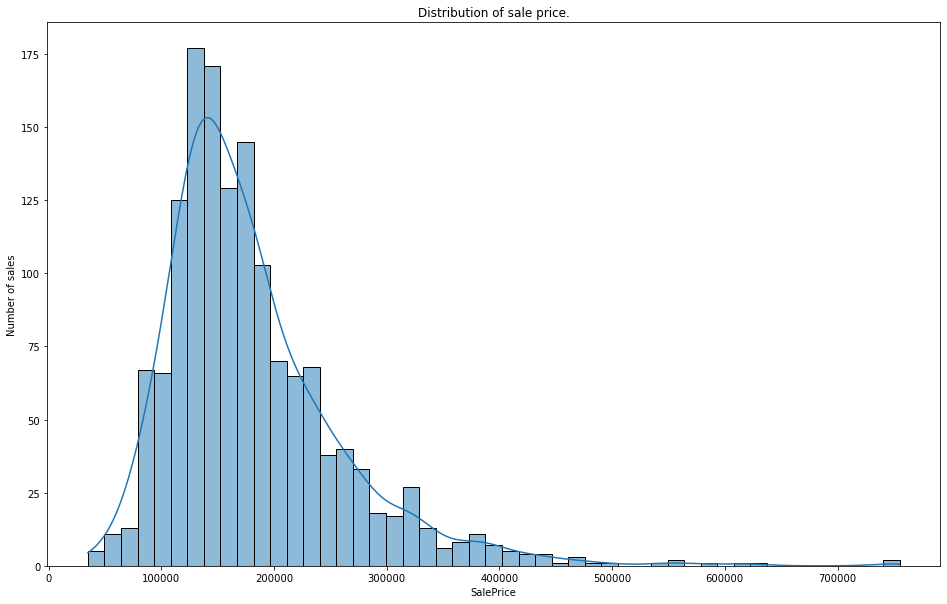

In [10]:
plt.figure(figsize=(16, 10))

sns.histplot(data=df['SalePrice'], kde=True)

plt.title('Distribution of sale price.')
plt.ylabel('Number of sales')

In [14]:
print(f"skewness: {df['SalePrice'].skew(): .3f}")
print(f"kurtosis: {df['SalePrice'].kurt(): .3f}")

skewness:  1.883
kurtosis:  6.536


## 2. Once we determine the target, we can then pick up serveral features to investigate the relationship between them. (use scatter plot for numeric values and box plots for categorical features)

## For example, we can select `GrLivArea`, `TotalBsmtSF`, `OverallQual` `YearBuilt`

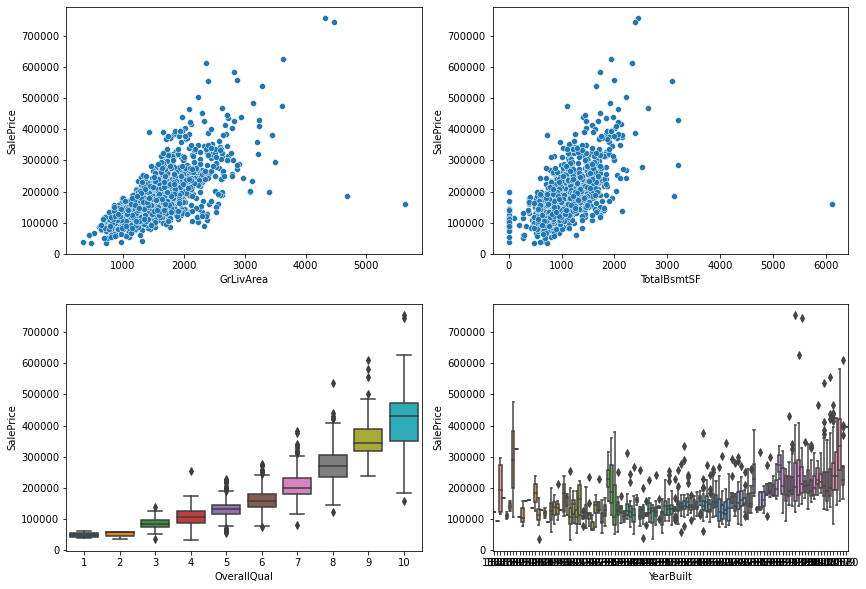

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

sns.scatterplot(x='GrLivArea', y='SalePrice', data=df, ax=axes[0][0])

sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df, ax=axes[0][1])

sns.boxplot(x='OverallQual', y='SalePrice', data=df, ax=axes[1][0])

sns.boxplot(x='YearBuilt', y='SalePrice', data=df, ax=axes[1][1])

In [22]:
corrmat = df.corr()

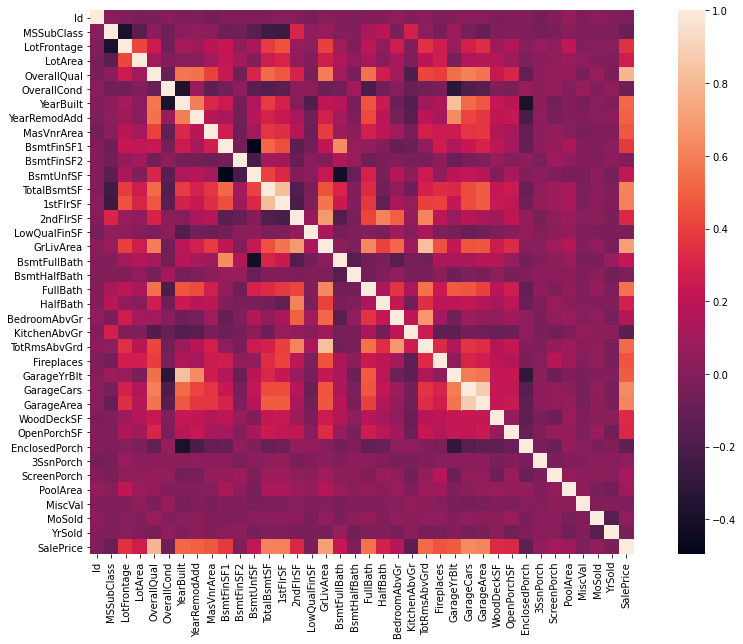

In [24]:
plt.figure(figsize=(16, 10))
sns.heatmap(data=corrmat, square=True)

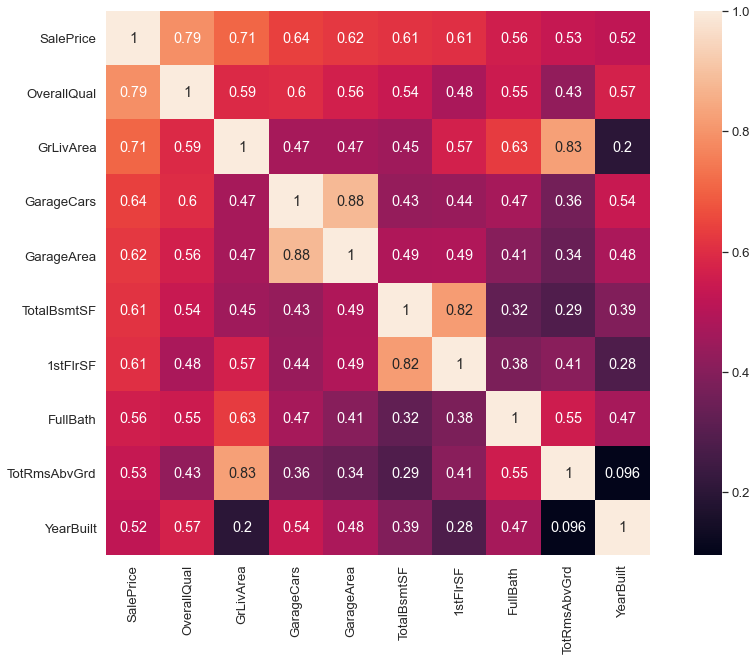

In [29]:
k = 10
top10_corr = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

df_top10 = df[top10_corr].corr()
plt.figure(figsize=(16, 10))
sns.set(font_scale=1.2)
sns.heatmap(data=df_top10, square=True, annot=True)

## 4. Handling Missing Data

In [40]:
missing_df = df.isnull().sum().sort_values(ascending=False)
percent_df = ( (df.isnull().sum()) / (df.isnull().count()) ).sort_values(ascending=False)

df_total = pd.concat([missing_df, percent_df], axis=1)
df_total.head(20)

,0,1
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479
